<a href="https://colab.research.google.com/github/AbR04/6thSem-ML-Lab/blob/main/1BM22CS005_Lab_5_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build a DecisionTree classifier to classify IRIS flower dataset

Use 80% of data for training and 20% for testing.

Display accuracy score and confusion matrix of the trained model on test data.


Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



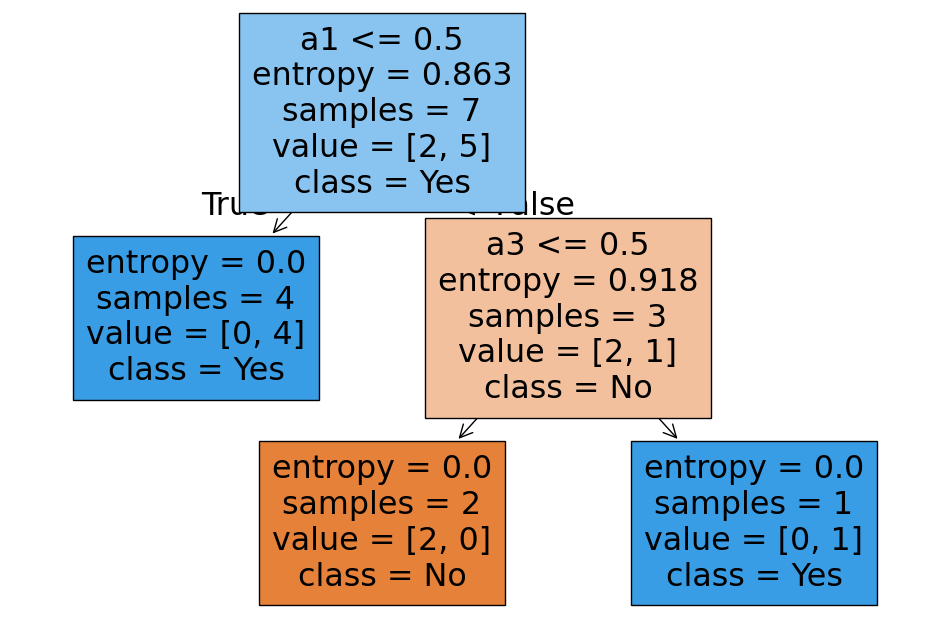

In [1]:
# -*- coding: utf-8 -*-
"""Decision_Tree.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RXDK8CR1doVCMHgkaXpJsNLAvzOIaXdd
"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
try:
    df = pd.read_csv("iris.csv")
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Optional: Visualize the Decision Tree (requires graphviz and pydotplus)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=y.unique(),
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree") # Saves the tree as a PDF file
print("\nDecision tree visualization saved as iris_decision_tree.pdf")

Accuracy Score on Test Data: 1.0

Confusion Matrix on Test Data:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report on Test Data:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Decision tree visualization saved as iris_decision_tree.pdf


Accuracy Score on Test Data: 1.0

Confusion Matrix on Test Data:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report on Test Data:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



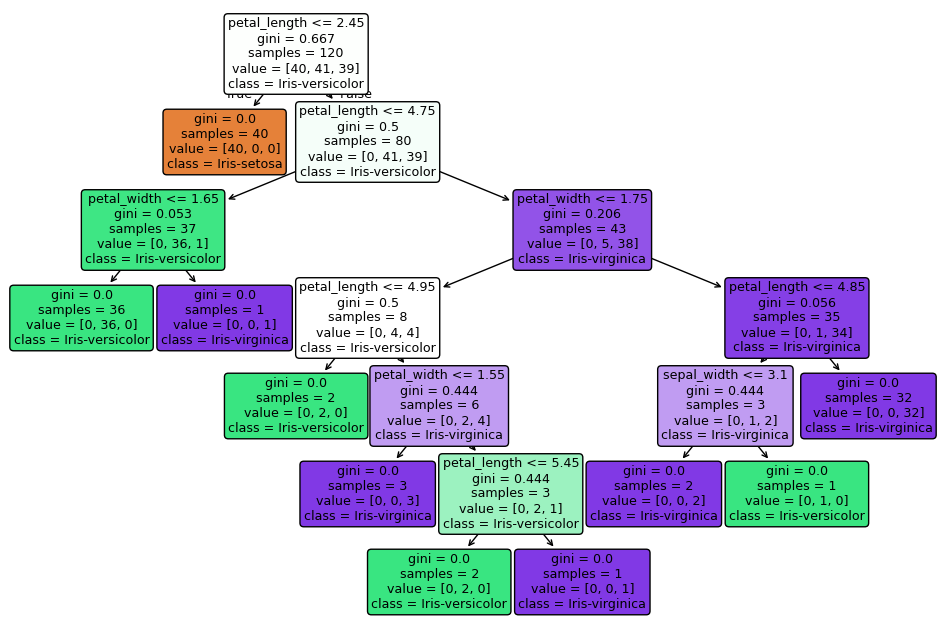

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv("iris.csv")
except FileNotFoundError:
    print("Error: 'iris.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Visualize the Decision Tree in the Colab interpreter
plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True)
plt.show()

Accuracy Score on Test Data: 1.0

Confusion Matrix on Test Data:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report on Test Data:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



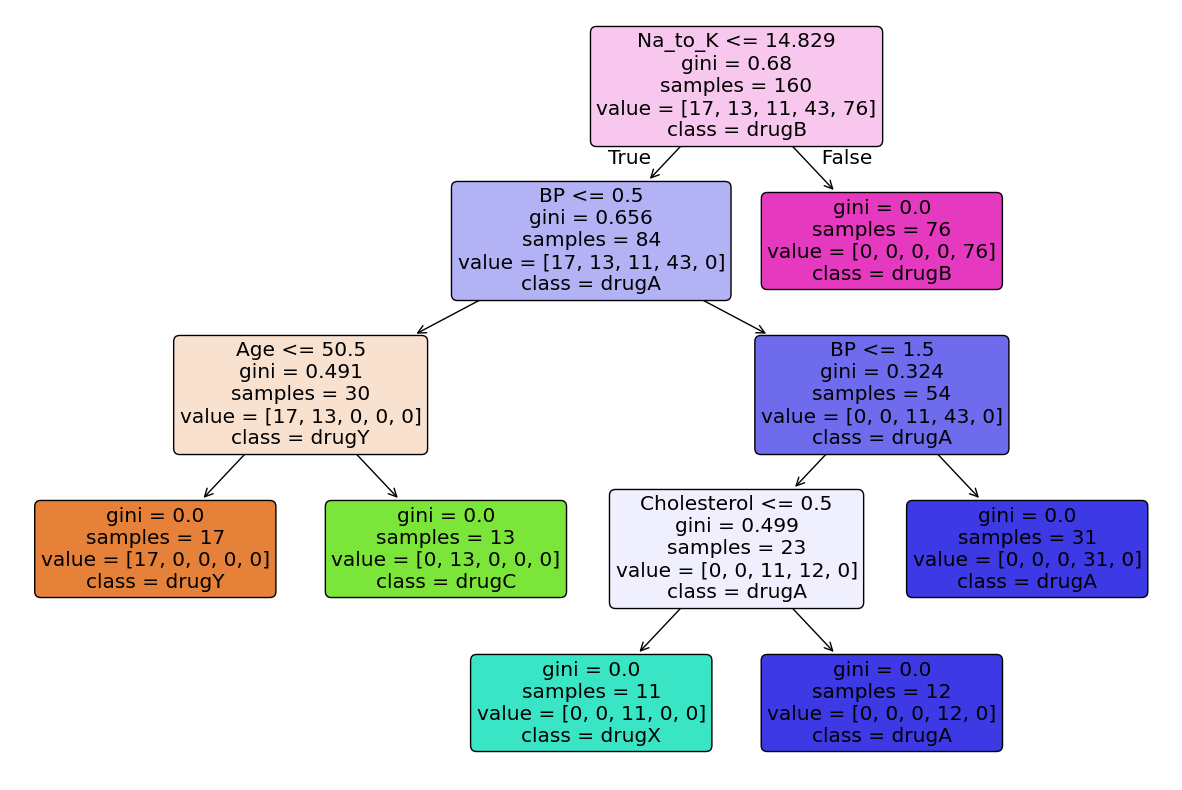

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv("drug.csv")  # Assuming the file is named 'drug200.csv'
except FileNotFoundError:
    print("Error: 'drug.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Convert categorical features to numerical using Label Encoding
categorical_cols = ['Sex', 'BP', 'Cholesterol']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Separate features (X) and target (y)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display the results
print("Accuracy Score on Test Data:", accuracy)
print("\nConfusion Matrix on Test Data:\n", confusion)
print("\nClassification Report on Test Data:\n", report)

# Visualize the Decision Tree in the Colab interpreter
plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=df['Drug'].unique(), rounded=True)
plt.show()

Mean Absolute Error (MAE) on Test Data: 94.3
Mean Squared Error (MSE) on Test Data: 17347.7
Root Mean Squared Error (RMSE) on Test Data: 131.7106677532234

Decision tree visualization saved as petrol_consumption_regression_tree.pdf


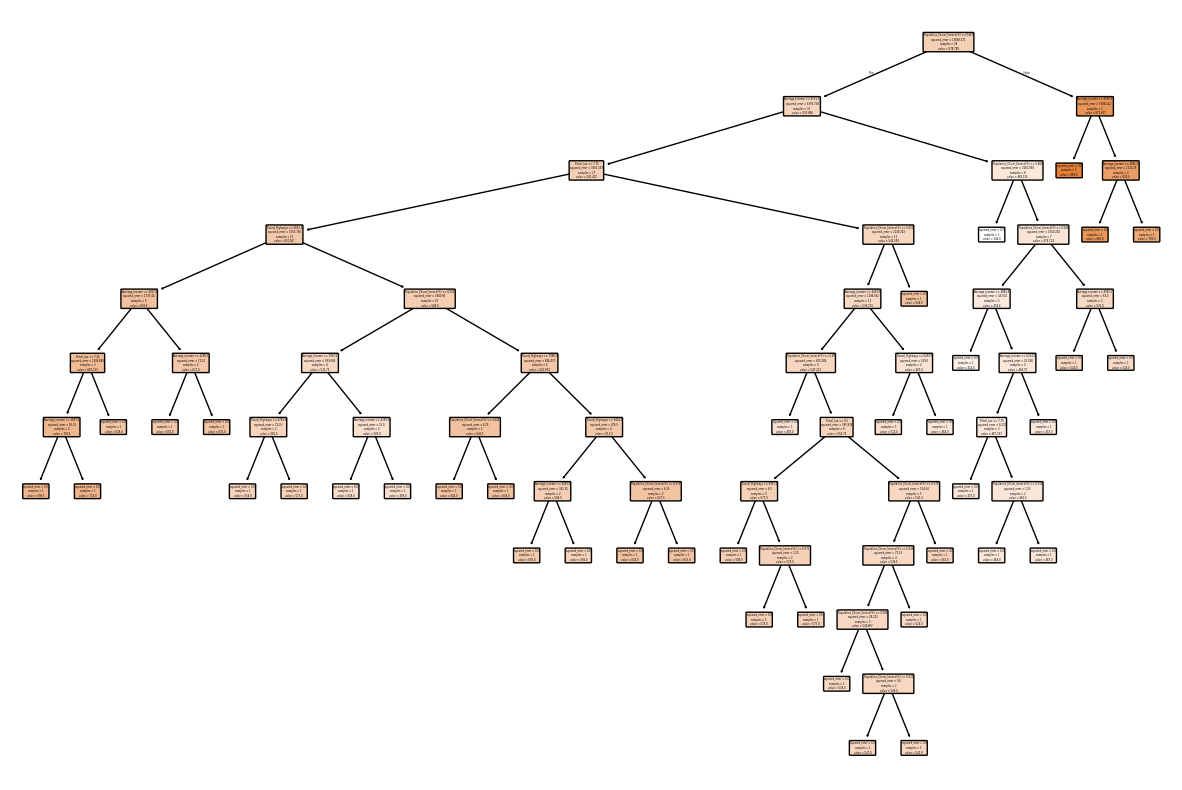

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Load the dataset
try:
    df = pd.read_csv("petrol_consumption.csv")
except FileNotFoundError:
    print("Error: 'petrol_consumption.csv' not found. Please make sure the file is in the correct directory.")
    exit()

# Separate features (X) and target (y)
X = df[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = df['Petrol_Consumption']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Regression Tree
regressor = DecisionTreeRegressor(random_state=42)

# Train the regressor
regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display the results
print("Mean Absolute Error (MAE) on Test Data:", mae)
print("Mean Squared Error (MSE) on Test Data:", mse)
print("Root Mean Squared Error (RMSE) on Test Data:", rmse)

# Optional: Visualize the Regression Tree (requires graphviz and pydotplus)
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(regressor, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("petrol_consumption_regression_tree") # Saves the tree as a PDF file
print("\nDecision tree visualization saved as petrol_consumption_regression_tree.pdf")

# Optional: Visualize the Regression Tree in Colab (less informative for regression)
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.show()